In [1]:
from Player import Player
from formulation import Card, Board, Gem, Noble
import random
import numpy as np

# total amount of noble cards
noble_amount = 10
# total amount of gem cards
card_amount = 90

# standard cards from the game
# https://docs.google.com/spreadsheets/d/15ghp8rJ_vdVgxZIVJGawAYQXRMZSVHJYpZRfQUplAhE/htmlview
CARDS = [Card([1, 1, 1, 1, 0], 0, Gem.BLACK),
         Card([1, 2, 1, 1, 0], 0, Gem.BLACK),
         Card([2, 2, 0, 1, 0], 0, Gem.BLACK),
         Card([0, 0, 1, 3, 1], 0, Gem.BLACK),
         Card([0, 0, 2, 1, 0], 0, Gem.BLACK),
         Card([2, 0, 2, 0, 0], 0, Gem.BLACK),
         Card([0, 0, 3, 0, 0], 0, Gem.BLACK),
         Card([0, 4, 0, 0, 0], 1, Gem.BLACK),

         Card([1, 0, 1, 1, 1], 0, Gem.BLUE),
         Card([1, 0, 1, 2, 1], 0, Gem.BLUE),
         Card([1, 0, 2, 2, 0], 0, Gem.BLUE),
         Card([0, 1, 3, 1, 0], 0, Gem.BLUE),
         Card([1, 0, 0, 0, 2], 0, Gem.BLUE),
         Card([0, 0, 2, 0, 2], 0, Gem.BLUE),
         Card([0, 0, 0, 0, 3], 0, Gem.BLUE),
         Card([0, 0, 0, 4, 0], 1, Gem.BLUE),

         Card([0, 1, 1, 1, 1], 0, Gem.WHITE),
         Card([0, 1, 2, 1, 1], 0, Gem.WHITE),
         Card([0, 2, 2, 0, 1], 0, Gem.WHITE),
         Card([3, 1, 0, 0, 1], 0, Gem.WHITE),
         Card([0, 0, 0, 2, 1], 0, Gem.WHITE),
         Card([0, 2, 0, 0, 2], 0, Gem.WHITE),
         Card([0, 3, 0, 0, 0], 0, Gem.WHITE),
         Card([0, 0, 4, 0, 0], 1, Gem.WHITE),

         Card([1, 1, 0, 1, 1], 0, Gem.GREEN),
         Card([1, 1, 0, 1, 2], 0, Gem.GREEN),
         Card([0, 1, 0, 2, 2], 0, Gem.GREEN),
         Card([1, 3, 1, 0, 0], 0, Gem.GREEN),
         Card([2, 1, 0, 0, 0], 0, Gem.GREEN),
         Card([0, 2, 0, 2, 0], 0, Gem.GREEN),
         Card([0, 0, 0, 3, 0], 0, Gem.GREEN),
         Card([0, 0, 0, 0, 4], 1, Gem.GREEN),

         Card([1, 1, 1, 0, 1], 0, Gem.RED),
         Card([2, 1, 1, 0, 1], 0, Gem.RED),
         Card([2, 0, 1, 0, 2], 0, Gem.RED),
         Card([1, 0, 0, 1, 3], 0, Gem.RED),
         Card([0, 2, 1, 0, 0], 0, Gem.RED),
         Card([2, 0, 0, 2, 0], 0, Gem.RED),
         Card([3, 0, 0, 0, 0], 0, Gem.RED),
         Card([4, 0, 0, 0, 0], 1, Gem.RED),

         Card([3, 2, 2, 0, 0], 1, Gem.BLACK),
         Card([3, 0, 3, 0, 2], 1, Gem.BLACK),
         Card([0, 1, 4, 2, 0], 2, Gem.BLACK),
         Card([0, 0, 5, 3, 0], 2, Gem.BLACK),
         Card([5, 0, 0, 0, 0], 2, Gem.BLACK),
         Card([0, 0, 0, 0, 6], 3, Gem.BLACK),

         Card([0, 2, 2, 3, 0], 1, Gem.BLUE),
         Card([0, 2, 3, 0, 3], 1, Gem.BLUE),
         Card([5, 3, 0, 0, 0], 2, Gem.BLUE),
         Card([2, 0, 0, 1, 4], 2, Gem.BLUE),
         Card([0, 5, 0, 0, 0], 2, Gem.BLUE),
         Card([0, 6, 0, 0, 0], 3, Gem.BLUE),

         Card([0, 0, 3, 2, 2], 1, Gem.WHITE),
         Card([2, 3, 0, 3, 0], 1, Gem.WHITE),
         Card([0, 0, 1, 4, 2], 2, Gem.WHITE),
         Card([0, 0, 0, 5, 3], 2, Gem.WHITE),
         Card([0, 0, 0, 5, 0], 2, Gem.WHITE),
         Card([6, 0, 0, 0, 0], 3, Gem.WHITE),

         Card([3, 0, 2, 3, 0], 1, Gem.GREEN),
         Card([2, 3, 0, 0, 2], 1, Gem.GREEN),
         Card([4, 2, 0, 0, 1], 2, Gem.GREEN),
         Card([0, 5, 3, 0, 0], 2, Gem.GREEN),
         Card([0, 0, 5, 0, 0], 2, Gem.GREEN),
         Card([0, 0, 6, 0, 0], 3, Gem.GREEN),

         Card([2, 0, 0, 2, 3], 1, Gem.RED),
         Card([0, 3, 0, 2, 3], 1, Gem.RED),
         Card([1, 4, 2, 0, 0], 2, Gem.RED),
         Card([3, 0, 0, 0, 5], 2, Gem.RED),
         Card([0, 0, 0, 0, 5], 2, Gem.RED),
         Card([0, 0, 0, 6, 0], 3, Gem.RED),

         Card([3, 3, 5, 3, 0], 3, Gem.BLACK),
         Card([0, 0, 0, 7, 0], 4, Gem.BLACK),
         Card([0, 0, 3, 6, 3], 4, Gem.BLACK),
         Card([0, 0, 0, 7, 3], 5, Gem.BLACK),

         Card([3, 0, 3, 3, 5], 3, Gem.BLUE),
         Card([7, 0, 0, 0, 0], 4, Gem.BLUE),
         Card([6, 3, 0, 0, 3], 4, Gem.BLUE),
         Card([7, 3, 0, 0, 0], 5, Gem.BLUE),

         Card([0, 3, 3, 5, 3], 3, Gem.WHITE),
         Card([0, 0, 0, 0, 7], 4, Gem.WHITE),
         Card([3, 0, 0, 3, 6], 4, Gem.WHITE),
         Card([3, 0, 0, 0, 7], 5, Gem.WHITE),

         Card([5, 3, 0, 3, 3], 3, Gem.GREEN),
         Card([0, 7, 0, 0, 0], 4, Gem.GREEN),
         Card([3, 6, 3, 0, 0], 4, Gem.GREEN),
         Card([0, 7, 3, 0, 0], 5, Gem.GREEN),

         Card([3, 5, 3, 0, 3], 3, Gem.RED),
         Card([0, 0, 7, 0, 0], 4, Gem.RED),
         Card([0, 3, 6, 3, 0], 4, Gem.RED),
         Card([0, 0, 7, 3, 0], 5, Gem.RED), ]

NOBLES = [(0, 0, 0, 4, 4),
          (3, 0, 3, 0, 3),
          (0, 4, 4, 0, 0),
          (4, 0, 4, 0, 0),
          (0, 4, 0, 4, 0),
          (0, 3, 0, 3, 3),
          (0, 3, 3, 3, 0),
          (4, 4, 0, 0, 0),
          (3, 3, 3, 0, 0),
          (3, 0, 0, 3, 3), ]

def noble_bonus(player: Player, nobles: list, verbose=True):
    
    n_bonus = sum([all([i >= j for i, j in zip(player.cards, list(noble))]) for noble in nobles])
    
    if verbose:
        print(f"Get {n_bonus} Bonus!")
    
    return 3 * n_bonus

In [2]:
import itertools
from copy import deepcopy

In [6]:
gamma = 0.8

def recursive_tree_search(player, board, iteration, root):
    
    value = min(15, player.score + noble_bonus(player, nobles, verbose=False))
        
    if iteration == 0:
        return value
    
    values = []
    _pbs = []
    actions = []
    
    for idx in range(len(board.deck)):
        card = board.deck[idx]
        if player.can_purchase_card(card):
            _player = deepcopy(player)
            _board = deepcopy(board)
            _player.purchase_card(card, _board)
            actions.append(f"Buy Card: {card}")
            _board.deck[idx].purchased = True
            values.append(value+gamma*recursive_tree_search(_player, _board, iteration-1, False))
            _pbs.append((_player, _board))
            
    if sum(player.gems) < 8:
        for combination in list(itertools.combinations(range(5), 3)):
            _player = deepcopy(player)
            _board = deepcopy(board)
            if all([_board.T[c] >= 1 for c in combination]):
                for c in combination:
                    _board.T[c] -= 1
                    _player.gems[c] += 1
                values.append(value+gamma*recursive_tree_search(_player, _board, iteration-1, False))
                _pbs.append((_player, _board))
                actions.append(f"Purchase Gem * 1: {combination}")

            
    if sum(player.gems) < 9:
        for idx in range(5):
            _player = deepcopy(player)
            _board = deepcopy(board)
            if _board.T[idx] >= 2:
                _board.T[idx] -= 2
                _player.gems[idx] += 2
                values.append(value+gamma*recursive_tree_search(_player, _board, iteration-1, False))
                _pbs.append((_player, _board))
                actions.append(f"Purchase Gem * 2: {idx}")
            
    if not root:    
        return max(values+[-100])
    else:
        values = np.array(values)
        idx = np.random.choice(np.flatnonzero(values == values.max()))
        return _pbs[idx]

In [7]:
from time import time

In [8]:
from tqdm.notebook import tqdm

p = 15
T = 6
card_amount = 40
noble_amount = 4

times = [[] for _ in range(3)] 

for run in tqdm(range(10)):

    cards = random.sample(CARDS, card_amount)

    nobles = random.sample(NOBLES, noble_amount)

    player = Player()

    for depth in [1, 2, 3]:
        
        start_time = time()

        _player = deepcopy(player)
        _cards, _nobles = deepcopy(cards), deepcopy(nobles)
        _board = Board(_cards, _nobles, T)

        for turn in range(1, 1+100):
            _player, _board = recursive_tree_search(_player, _board, depth, True)
            if _player.score + noble_bonus(_player, _nobles, verbose=False) >= p:
                break
        
        end_time = time()
        
        times[depth-1].append((end_time-start_time)/turn)
        print(times)

  0%|          | 0/10 [00:00<?, ?it/s]

[[0.00989999220921443], [], []]
[[0.00989999220921443], [0.17551398277282715], []]
[[0.00989999220921443], [0.17551398277282715], [2.6256675362586974]]
[[0.00989999220921443, 0.00836634635925293], [0.17551398277282715], [2.6256675362586974]]
[[0.00989999220921443, 0.00836634635925293], [0.17551398277282715, 0.19273861249287924], [2.6256675362586974]]
[[0.00989999220921443, 0.00836634635925293], [0.17551398277282715, 0.19273861249287924], [2.6256675362586974, 2.3681795597076416]]
[[0.00989999220921443, 0.00836634635925293, 0.008432700083805965], [0.17551398277282715, 0.19273861249287924], [2.6256675362586974, 2.3681795597076416]]
[[0.00989999220921443, 0.00836634635925293, 0.008432700083805965], [0.17551398277282715, 0.19273861249287924, 0.18123446978055513], [2.6256675362586974, 2.3681795597076416]]
[[0.00989999220921443, 0.00836634635925293, 0.008432700083805965], [0.17551398277282715, 0.19273861249287924, 0.18123446978055513], [2.6256675362586974, 2.3681795597076416, 1.89342683553695

ValueError: zero-size array to reduction operation maximum which has no identity

In [17]:
tracks = []

from tqdm.notebook import tqdm

p = 15
T = 6
card_amount = 40
noble_amount = 4

cards = random.sample(CARDS, card_amount)

nobles = random.sample(NOBLES, noble_amount)

player = Player()

for depth in [1, 2, 3]:

    track = []

    _player = deepcopy(player)
    _cards, _nobles = deepcopy(cards), deepcopy(nobles)
    _board = Board(_cards, _nobles, T)

    for turn in range(1, 1+100):
        _player, _board = recursive_tree_search(_player, _board, depth, True)
        track.append(_player.score + noble_bonus(_player, _nobles, verbose=False))
        if _player.score + noble_bonus(_player, _nobles, verbose=False) >= p:
            break
            
    tracks.append(track)

Purchase Gem * 2: 4
Purchase Gem * 1: (0, 1, 4)
Purchase Gem * 2: 2
Buy Card: [Score: 0, Color: Gem.BLUE, Gems: [0, 0, 2, 0, 2], Purchased: False]
Purchase Gem * 1: (0, 1, 3)
Purchase Gem * 1: (1, 2, 4)
Buy Card: [Score: 0, Color: Gem.GREEN, Gems: [2, 1, 0, 0, 0], Purchased: False]
Purchase Gem * 1: (0, 2, 4)
Buy Card: [Score: 0, Color: Gem.BLUE, Gems: [1, 0, 1, 1, 1], Purchased: False]
Buy Card: [Score: 2, Color: Gem.BLUE, Gems: [0, 5, 0, 0, 0], Purchased: False]
Purchase Gem * 1: (0, 1, 4)
Purchase Gem * 2: 3
Buy Card: [Score: 1, Color: Gem.WHITE, Gems: [0, 0, 3, 2, 2], Purchased: False]
Purchase Gem * 1: (1, 2, 3)
Purchase Gem * 1: (0, 2, 3)
Buy Card: [Score: 2, Color: Gem.GREEN, Gems: [0, 5, 3, 0, 0], Purchased: False]
Buy Card: [Score: 1, Color: Gem.BLACK, Gems: [3, 2, 2, 0, 0], Purchased: False]
Purchase Gem * 1: (0, 1, 3)
Buy Card: [Score: 1, Color: Gem.WHITE, Gems: [2, 3, 0, 3, 0], Purchased: False]
Purchase Gem * 2: 3
Purchase Gem * 2: 0
Buy Card: [Score: 1, Color: Gem.RED, Ge

In [10]:
[np.mean(t) for t in [[0.00989999220921443, 0.00836634635925293, 0.008432700083805965, 0.006506407702410662, 0.0076519525968111474], [0.17551398277282715, 0.19273861249287924, 0.18123446978055513, 0.14899390676747198, 0.1991398416716477], [2.6256675362586974, 2.3681795597076416, 1.8934268355369568, 1.8657446911460476, 3.5272560318311057]]]

[0.008171479790299026, 0.17952416269707622, 2.45605493089609]

Text(0, 0.5, 'Log Time')

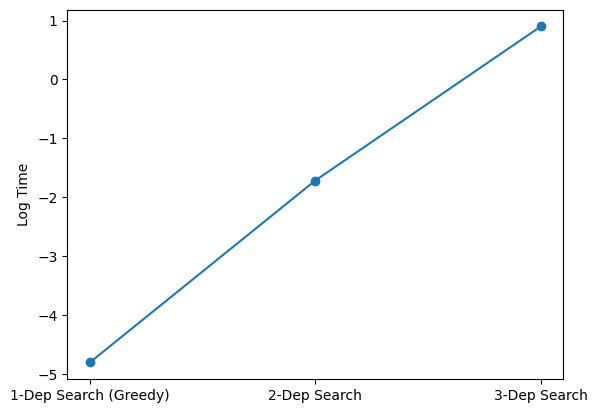

In [23]:
import matplotlib.pyplot as plt

plt.plot(np.log([0.008171479790299026, 0.17952416269707622, 2.45605493089609]), marker="o")
    
plt.xticks([0, 1, 2], ["1-Dep Search (Greedy)", "2-Dep Search", "3-Dep Search"])
plt.ylabel("Log Time")